In [17]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Hyperparameters
input_dim = 1
output_dim = 1
num_epochs = 60
learning_rate = 0.001

In [19]:
# Create dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [20]:
# Linear regression model
model = nn.Linear(input_dim, output_dim)

In [21]:
# Loss and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [22]:
# Train model
for epoch in range (num_epochs):
    inputs = torch.from_numpy(x_train)
    labels = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = loss_fn(outputs, labels)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print("Epoch [{}/{}], Loss: {:.4f}".format(epoch+1, num_epochs, loss.item()))
    

Epoch [5/60], Loss: 26.2686
Epoch [10/60], Loss: 10.9285
Epoch [15/60], Loss: 4.7135
Epoch [20/60], Loss: 2.1953
Epoch [25/60], Loss: 1.1746
Epoch [30/60], Loss: 0.7606
Epoch [35/60], Loss: 0.5925
Epoch [40/60], Loss: 0.5239
Epoch [45/60], Loss: 0.4956
Epoch [50/60], Loss: 0.4837
Epoch [55/60], Loss: 0.4784
Epoch [60/60], Loss: 0.4758


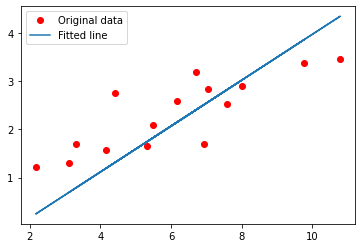

In [23]:
# Plot the graph
y_pred = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label="Original data")
plt.plot(x_train, y_pred, label="Fitted line")
plt.legend()
plt.show()

In [24]:
# Save model checkpoint
torch.save(model.state_dict(), "model.ckpt")